In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bandit import BanditSigmoid, BanditLinear

from reinforcement_learning import (
    streaming_cross_learning,
    streaming_maynard_cross_learning,
    parallel_cross_learning,
    parallel_maynard_cross_learning,
)

from population_simulation import imitaton_of_success, weighted_voter_rule

from analytical_solutions import replicator_dynamic
import matplotlib.gridspec as gridspec

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

plt.rcParams["text.latex.preamble"] = r"\usepackage{lmodern} \usepackage{amsmath}"
# Options
params = {
    "text.usetex": True,
    "font.size": 10,
    "font.family": "lmodern",
    #   'text.latex.unicode': True,
}
plt.rcParams.update(params)

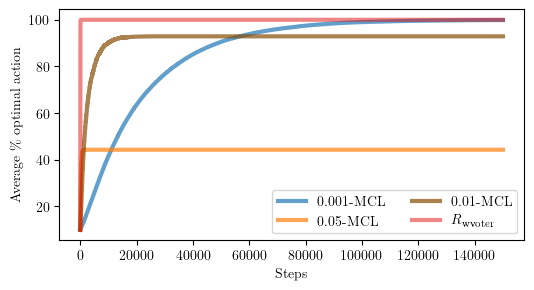

In [39]:
alphas = [0.001, 0.05, 0.01]
# population_sizes = [10, 1000]
seeds = 1000
name = "evenly spaced"


fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]
i = 0
bandit = BanditLinear(name=name)

steps = int(150 / alphas[0])
for alpha in alphas:

    _, optimal_action_mcl = streaming_maynard_cross_learning(
        bandit=bandit, seeds=seeds, alpha=alpha, steps=steps, alpha_baseline=0.01
    )

    ax.plot(
        range(steps),
        optimal_action_mcl.mean(axis=1) * 100,
        label=f"{alpha}-MCL",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1


# simulate MRD
steps_pmcl = 1500
_, optimal_action_pmcl = parallel_maynard_cross_learning(
    steps=steps_pmcl, seeds=seeds, bandit=bandit, parallel_envs=int(1 / alphas[0])
)

optimal_action_pmcl_mean = optimal_action_pmcl.mean(axis=1)
extend = np.full(steps - steps_pmcl, optimal_action_pmcl_mean[-1])
optimal_action_pmcl_mean = np.concatenate((optimal_action_pmcl_mean, extend))


ax.plot(
    range(steps),
    optimal_action_pmcl_mean * 100,
    label=r"$R_{\text{wvoter}}$",
    color=colors[-1],
    linewidth=3,
    alpha=0.5,
)

ax.set_ylabel(r"Average $\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=2)

plt.savefig(f"MCL_with_many_alphas.pdf", bbox_inches="tight", dpi=900)

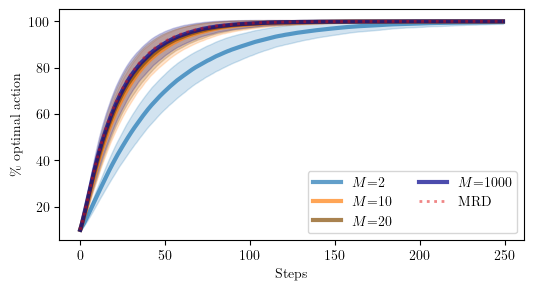

In [15]:
nei_sizes = [2, 10, 20, 1000]
# population_sizes = [10, 1000]
seeds = 1000
steps = 250
name = "evenly spaced"
bandit = BanditLinear(name=name)
population_size = 1000


fig, ax = plt.subplots(1, 1, figsize=(6, 3))
colors = ["#1f77b4", "#ff7f0e", "#854d05", "#00008b", "#2ca02c", "#e00e0e"]

i = 0
for nei_size in nei_sizes:

    mean_rewards_wvr, optimal_action_wvr = weighted_voter_rule(
        steps=steps,
        population_size=population_size,
        seeds=seeds,
        bandit=bandit,
        neighbourhood_size=nei_size,
    )

    ax.fill_between(
        range(steps),
        optimal_action_wvr.mean(axis=0) * 100 - optimal_action_wvr.std(axis=0) * 100,
        optimal_action_wvr.mean(axis=0) * 100 + optimal_action_wvr.std(axis=0) * 100,
        color=colors[i],
        alpha=0.2,
    )

    ax.plot(
        range(steps),
        optimal_action_wvr.mean(axis=0) * 100,
        label=r"$M$" + f"={nei_size}",
        color=colors[i],
        alpha=0.7,
        linewidth=3,
    )

    i += 1

mean_rewards_mrd, optimal_action_mrd = replicator_dynamic(
    delta=1, bandit=bandit, steps=steps, trd=False
)

ax.plot(
    range(steps),
    optimal_action_mrd * 100,
    label=r"MRD",
    color=colors[-1],
    linestyle="dotted",
    linewidth=2,
    alpha=0.5,
)

ax.set_ylabel(r"$\%$ optimal action", fontsize=10)
ax.set_xlabel("Steps", fontsize=10)
ax.set_yticks([i for i in np.arange(20, 120, 20)])
ax.set_yticklabels([f"{i}" for i in np.arange(20, 120, 20)], fontsize=10)
# ax.set_xscale("log")
ax.legend(loc="lower right", fontsize=10, ncols=2)
plt.savefig(f"wvr_with_many_nei_sizes.pdf", bbox_inches="tight", dpi=900)